# Importing Required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import re

# Reading data file

In [2]:
df = pd.read_csv('DATASETS/dataset (1)/dataset.csv',encoding=('ISO-8859-1'),low_memory=False)

In [3]:
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [4]:
df['SentimentText']

0                             is so sad for my APL frie...
1                           I missed the New Moon trail...
2                                  omg its already 7:30 :O
3                  .. Omgaga. Im sooo  im gunna CRy. I'...
4                 i think mi bf is cheating on me!!!   ...
                               ...                        
99984    @Cupcake  seems like a repeating problem   hop...
99985    @cupcake__ arrrr we both replied to each other...
99986                       @CuPcAkE_2120 ya i thought so 
99987    @Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988                      @cupcake_kayla haha yes you do 
Name: SentimentText, Length: 99989, dtype: object

In [5]:
df['Sentiment']

0        0
1        0
2        1
3        0
4        0
        ..
99984    0
99985    1
99986    0
99987    1
99988    1
Name: Sentiment, Length: 99989, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


# Function for text Cleaning

In [7]:
def CleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)             #Removed @mentions
    text = re.sub(r'#','',text)                         #Removed the '#' Symbol
    text = re.sub(r'RT[\s]+','',text)                   #Removed RT
    text = re.sub(r'https?:\/\/\S+','',text)            #Removed Hyper Link
    
    return(text)

In [8]:
df['SentimentText'] = df['SentimentText'].apply(CleanText)

In [9]:
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,seems like a repeating problem hope you're...
99985,99997,1,__ arrrr we both replied to each other over di...
99986,99998,0,_2120 ya i thought so
99987,99999,1,_Dollie Yes. Yes. I'm glad you had more fun wi...


# Data visualization

In [10]:
import wordcloud

In [11]:
allword = ' '.join(tweets for tweets in df['SentimentText'])

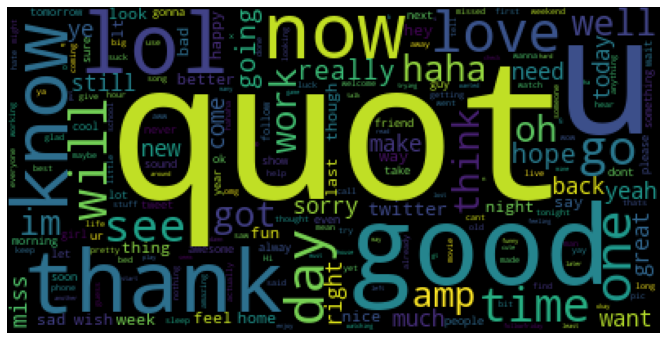

In [12]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(allword)
plt.figure(figsize=(12,6))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

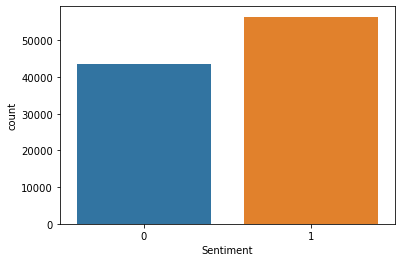

In [13]:
sns.countplot(df['Sentiment'])
plt.show()

In [14]:
X = df['SentimentText']

In [15]:
X.head()

0                         is so sad for my APL frie...
1                       I missed the New Moon trail...
2                              omg its already 7:30 :O
3              .. Omgaga. Im sooo  im gunna CRy. I'...
4             i think mi bf is cheating on me!!!   ...
Name: SentimentText, dtype: object

In [16]:
y = df['Sentiment']

In [17]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Sentiment, dtype: int64

# Spliting the train and test data in 75:25 ratio

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1,stratify=y)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [21]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
from sklearn.model_selection import cross_val_score

# Selecting the best Algorithm through Cross Validation

# Multinomial Naive Bayes 

In [24]:
MNB_clf = make_pipeline(TfidfVectorizer(),MultinomialNB())
scores = cross_val_score(MNB_clf, X, y, cv=10)
print('List of Scores: ',scores)
print('\n')
print('Mean of Scores: ',scores.mean())


List of Scores:  [0.72757276 0.68836884 0.72847285 0.73227323 0.74237424 0.73607361
 0.73347335 0.74107411 0.7349735  0.73664733]


Mean of Scores:  0.7301303795112457


# Bernoulli Naive Bayes 

In [25]:
BNB_clf = BNB_clf = make_pipeline(TfidfVectorizer(),BernoulliNB())
scores = cross_val_score(BNB_clf, X, y, cv=10)
print('List of Scores: ',scores)
print('\n')
print('Mean of Scores: ',scores.mean())


List of Scores:  [0.70457046 0.69256926 0.73237324 0.73717372 0.74457446 0.74177418
 0.73757376 0.74727473 0.74317432 0.74264853]


Mean of Scores:  0.7323706635516521


# Stochastic Gradient Descent 

In [26]:
SGD_clf =make_pipeline(TfidfVectorizer(),SGDClassifier())
scores = cross_val_score(SGD_clf, X, y, cv=10)
print('List of Scores: ',scores)
print('\n')
print('Mean of Scores: ',scores.mean())


List of Scores:  [0.75607561 0.71557156 0.75927593 0.75887589 0.7629763  0.759976
 0.75367537 0.7649765  0.7619762  0.75455091]


Mean of Scores:  0.7547930248115831


# Logistic Regression

In [27]:
LogReg_clf =make_pipeline(TfidfVectorizer(),LogisticRegression(solver='lbfgs', max_iter=1000))
scores = cross_val_score(LogReg_clf, X, y, cv=10)
print('List of Scores: ',scores)
print('\n')
print('Mean of Scores: ',scores.mean())


List of Scores:  [0.7519752  0.72357236 0.76547655 0.76707671 0.77047705 0.77137714
 0.75937594 0.76977698 0.76467647 0.76665333]


Mean of Scores:  0.7610437709103977


# Model Evaluation

# Multinomial Naive Bayes

In [28]:
MNB_clf = make_pipeline(TfidfVectorizer(),MultinomialNB())
MNB_clf.fit(X_train,y_train)

MNB_clf.fit(X_train,y_train)
pred = MNB_clf.predict(X_test)

print("Classification Report \n")
print(classification_report(y_test,pred))


print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))


Classification Report 

              precision    recall  f1-score   support

           0       0.78      0.58      0.66     10883
           1       0.73      0.88      0.80     14115

    accuracy                           0.75     24998
   macro avg       0.76      0.73      0.73     24998
weighted avg       0.75      0.75      0.74     24998

Confusion Matrix

[[ 6271  4612]
 [ 1737 12378]]


# Bernoulli Naive Bayes

In [29]:
BNB_clf = make_pipeline(TfidfVectorizer(),BernoulliNB())
BNB_clf.fit(X_train,y_train)
pred = BNB_clf.predict(X_test)

print("Classification Report \n")
print(classification_report(y_test,pred))


print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))


Classification Report 

              precision    recall  f1-score   support

           0       0.73      0.64      0.69     10883
           1       0.75      0.82      0.78     14115

    accuracy                           0.74     24998
   macro avg       0.74      0.73      0.74     24998
weighted avg       0.74      0.74      0.74     24998

Confusion Matrix

[[ 7017  3866]
 [ 2532 11583]]


# Stochastic Gradient Descent

In [30]:
SGD_clf =make_pipeline(TfidfVectorizer(),SGDClassifier())
SGD_clf.fit(X_train,y_train)
pred = SGD_clf.predict(X_test)

print("Classification Report \n")
print(classification_report(y_test,pred))


print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))


Classification Report 

              precision    recall  f1-score   support

           0       0.77      0.64      0.70     10883
           1       0.76      0.85      0.80     14115

    accuracy                           0.76     24998
   macro avg       0.76      0.75      0.75     24998
weighted avg       0.76      0.76      0.76     24998

Confusion Matrix

[[ 7009  3874]
 [ 2153 11962]]


# Logistic Regression

In [31]:
LogReg_clf =make_pipeline(TfidfVectorizer(),LogisticRegression(solver='lbfgs', max_iter=1000))
LogReg_clf.fit(X_train,y_train)
pred = LogReg_clf.predict(X_test)

print("Classification Report \n")
print(classification_report(y_test,pred))


print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))



Classification Report 

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     10883
           1       0.78      0.83      0.80     14115

    accuracy                           0.77     24998
   macro avg       0.76      0.76      0.76     24998
weighted avg       0.77      0.77      0.77     24998

Confusion Matrix

[[ 7501  3382]
 [ 2448 11667]]


# Logistic Regression seems the best based on  higher accuracy

# Sentiment has some class imbalance beacuse which f1 score of class-1 is more as compared to class-0

In [32]:
df['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

# Under sampling the class-1 to improve f-1 score

In [33]:
class_1 = df[df['Sentiment']==1]
class_0 = df[df['Sentiment']==0]

In [34]:
class_1_under = class_1.iloc[:43532,]

In [35]:
combine_df = pd.concat([class_1_under,class_0],axis=0,ignore_index=False)

In [36]:
combine_df['Sentiment'].value_counts()

1    43532
0    43532
Name: Sentiment, dtype: int64

In [37]:
X = combine_df['SentimentText']

In [38]:
y = combine_df['Sentiment']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=1,stratify=y)

In [40]:
y_train.value_counts()

1    32649
0    32649
Name: Sentiment, dtype: int64

In [41]:
y_test.value_counts()

1    10883
0    10883
Name: Sentiment, dtype: int64

In [42]:
LogReg_clf.fit(X_train,y_train)
pred = LogReg_clf.predict(X_test)

print("Classification Report \n")
print(classification_report(y_test,pred))


print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.77      0.76      0.76     10883
           1       0.76      0.77      0.77     10883

    accuracy                           0.76     21766
   macro avg       0.76      0.76      0.76     21766
weighted avg       0.76      0.76      0.76     21766

Confusion Matrix

[[8265 2618]
 [2501 8382]]


# Model building through  Neural Network  Network using TensorFlow and Keras 

In [43]:
import keras 
import tensorflow

In [44]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [45]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
           results[i, sequence] = 1.
    return results

In [46]:
def text_to_vector(X):
    tokenizer = Tokenizer(num_words=1000)
    tokenizer.fit_on_texts(X)
    a = tokenizer.texts_to_sequences(X)
    b = pad_sequences(a,padding='post')
    return b

In [47]:
X_seq = text_to_vector(X_train)
X2_seq = text_to_vector(X_test)


In [48]:
X_tensor_train = vectorize_sequences(X_seq)
X_tensor_test = vectorize_sequences(X2_seq)

In [49]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_train.shape

(65298,)

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [51]:
model = Sequential()

In [52]:
model.add(Dense(10, activation='relu', input_shape=(10000,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [54]:
history = model.fit(X_tensor_train, y_train,epochs=3, batch_size=100)

Epoch 1/3
653/653 [==============================] - 37s 15ms/step - loss: 0.6074 - accuracy: 0.6906
Epoch 2/3
653/653 [==============================] - 7s 11ms/step - loss: 0.5077 - accuracy: 0.7543
Epoch 3/3
653/653 [==============================] - 7s 10ms/step - loss: 0.5009 - accuracy: 0.7595


In [55]:
model.evaluate(X_tensor_test,y_test)

681/681 [==============================] - 56s 13ms/step - loss: 0.8338 - accuracy: 0.5486


[0.8337788581848145, 0.5485619902610779]

In [56]:
# Nueral Network seems not good for this problem